This is the base code that transforms one random polygon with n vertices in an another random polygon with the same number of vertices.
\
There are 3 main functions:
\
function generate_subspaces(n) => generate the random subspaces that represent the triangles\
function cs_decomposition(n,E,F,E1,E2,F1,F2) => makes a cs decomposition on the two subspaces generated\
function draw(M, n) => converts the input matrix (the base) into points on the graph that represent the triangle



In [25]:
using LinearAlgebra
using Plots

In [26]:
function generate_subspaces(n)
    E,=qr(randn(n,n))
    E1=E[:,1:2]
    E2=E[:,3:end]
    F,=qr(randn(n,n))
    F1=F[:,1:2]
    F2=F[:,3:end]
    return E,F,E1,E2,F1,F2
end

generate_subspaces (generic function with 1 method)

In [27]:
function cs_decomposition(n,E,F,E1,E2,F1,F2)
    U1,S11,V1=svd(E1'*F1,full=true)
    temp,S12,V2=svd(E1'*F2,full=true)
    U2,S22,V2=svd(E2'*F2,full=true)
    D=[U1'*E1'*F1*V1 U1'*E1'*F2*V2
    U2'*E2'*F1*V1 U2'*E2'*F2*V2]
    U=[U1 zeros(2,n-2)
    zeros(n-2,2) U2]
    W=E*U*D*U'*E'
    return W, U, U1, U2, V1, V2, D
end

cs_decomposition (generic function with 1 method)

In [28]:
function get_D_angle(D,n)
    angle= rad2deg(acos(D[n,n]))
    return angle
  end

get_D_angle (generic function with 1 method)

In [29]:
function draw(M, n)
    x = M[:, 1]
    y = M[:, 2]
    z = x + im * y
    e = z .^ 2
    E = [real(e)' ; imag(e)']
    
    points = zeros(2, n + 1)
    for i in 1:n
        points[:, i + 1] = sum(E[:, 1:i], dims=2)
    end
    
    return points
end

draw (generic function with 1 method)

In [30]:
n=3
E,F,E1,E2,F1,F2=generate_subspaces(n)

(LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([0.8490241222301307 0.945388650337998 -0.4842106911145414; -0.32978600925183077 1.0055844030399428 -1.7255872560883148; 0.02506639407099664 0.5097496899485271 -0.8226848666583132], [1.8027971797051954 0.9072576472948745 0.0; 9.347757469436e-312 1.5874971941668459 0.0; 9.347757469673e-312 9.347757470384e-312 0.0]), LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}([1.2896707025241223 -1.0387693547697876 1.5147750006531358; -0.7202988822648824 1.7367098197092827 -0.9275001912681673; -0.17893118104311978 -0.23831957648461263 -0.640791204911396], [1.28961799382603 1.653899694367875 0.0; 9.347757469436e-312 1.8925124457636517 0.0; 9.347757469673e-312 9.347757470384e-312 0.0]), [-0.8027971797051954 -0.31272035990944247; 0.594537287385432 -0.48436639466051457; -0.04518962453657178 -0.8170649742962204], [-0.5076639289485642; -0.6418057413516545; 0.5747718900681908;;], [-0.28961799382602993 -0.72498929486

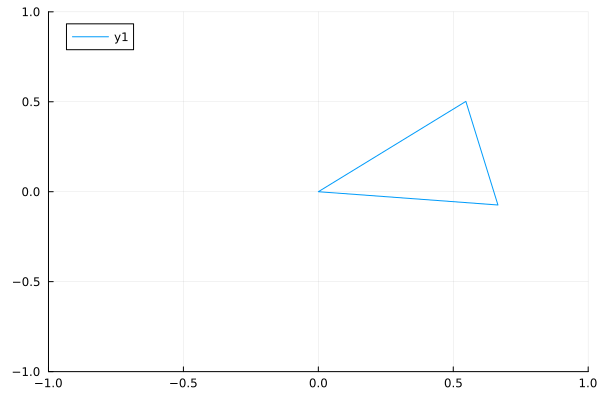

In [31]:
points=draw(E1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

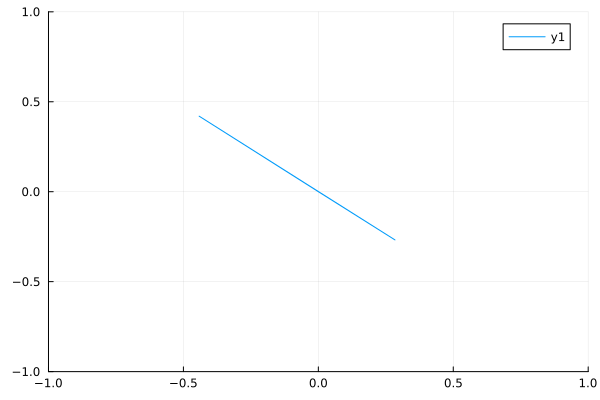

In [32]:
points=draw(F1,n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

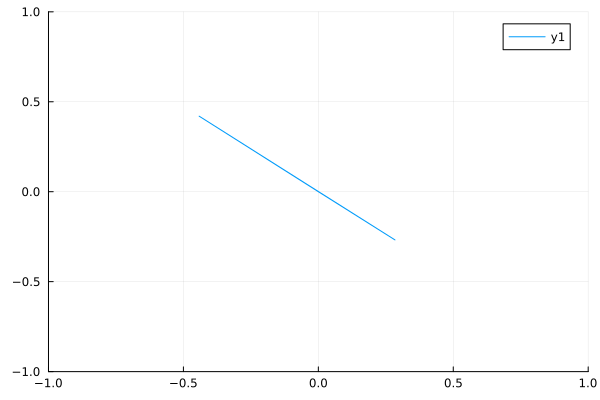

In [33]:
W, U, U1, U2, V1, V2, D=cs_decomposition(n,E,F,E1,E2,F1,F2)
points=draw(W*E1*U1*V1', n)
plot(points[1,:],points[2,:],xlim=[-1,1], ylim=[-1,1])

In [34]:
display(get_D_angle(D,n))
display(D)


82.47839083164068

3×3 Matrix{Float64}:
  1.0          1.11022e-16   1.72383e-16
 -3.46945e-17  0.1309       -0.991396
 -4.56508e-16  0.991396      0.1309

[I   0   0\
 0   C   -S\
 0   S    C]

In [35]:

function smooth_transition()
    W, U, U1, U2, V1, V2, D = cs_decomposition(n, E, F, E1, E2, F1, F2)
    max_angle = get_D_angle(D, n)
    anim = @animate for angle in 0:1:max_angle
        D[2,2] = cosd(angle)
        D[2,3] = -sind(angle)
        D[3,2] = sind(angle)
        D[3,3] = cosd(angle)
        W = E * U * D * U' * E'
        points = draw(W*E1*U1*V1' , n)
        plot(points[1, :], points[2, :], xlim = [-1, 1], ylim = [-1, 1], legend = true, label = "Angle: $angle")
    end
    gif(anim, "smooth_transition.gif", fps = 10) # Save the animation as a GIF
end

smooth_transition (generic function with 1 method)

[ Info: Saved animation to c:\Users\Usuario\Programação\CSD-Polygons\smooth_transition.gif


Plots.AnimatedGif("c:\\Users\\Usuario\\Programação\\CSD-Polygons\\smooth_transition.gif")
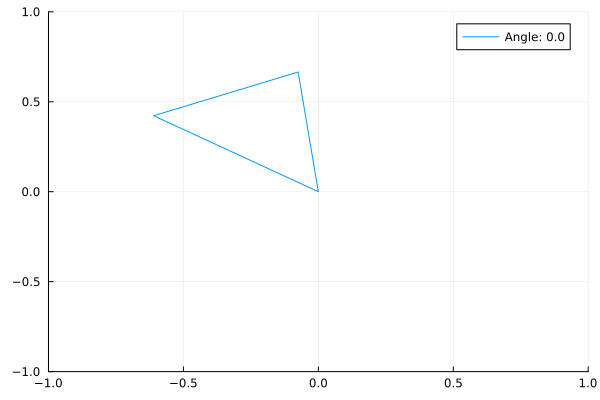

In [36]:
smooth_transition()

In [37]:
rad2deg(acos(0.5))
deg2rad(60)

1.0471975511965976